In [1]:
import numpy as np 
import pandas as pd
import feyn
from feyn.tools import split
from feyn.losses import binary_cross_entropy
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
ql = feyn.QLattice(qlattice="3c83b161", api_token="9ba5b8ae7a0b4206b23e413c741eda73")

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "QSAR.png",width=800,height=800)


In [3]:
# Load the curated Estrogen data set
df = pd.read_csv("estrogen_indexes_nolabels.csv", sep=";")

# Published predictor:
# LogRBA = -43.75 * X2A + 0.04 * TIC1 - 2.67 * EEig02d + 79.92 * JGI10 + 2.6 * SPH - 7.12 * E1u + 4.78 * RTm_plus - 1.25 * nArOR + 15.83
def QDB_Predictor(X2A, TIC1, EEig02d, JGI10, SPH, E1u, RTm_plus, nArOR):
    literature_prediction = -43.75 * X2A + 0.04 * TIC1 - 2.67 * EEig02d + 79.92 * JGI10 + 2.6 * SPH - 7.12 * E1u + 4.78 * RTm_plus - 1.25 * nArOR + 15.83
    return literature_prediction.to_numpy()


In [4]:
descriptors = {
 "X2A" : "Average connectivity index chi-2",
 "TIC1" : "Total information index (neighborhood symmetry 1-order)",
 "EEig02d" : "Eigenvalue 2 from edge adjacency matrix weighted dipole moments",
 "JGI10": "Mean topological charge index of order 10",
 "SPH" : "Spherosity index",
 "E1u" : "The first component accessibility directional WHIM index/unweighted",
 "nArOR" : "The number of aromatic ether groups",
 "RTm_plus" : "R maximal index weighed by atomic masses"}
descriptors["X2A"]

'Average connectivity index chi-2'

In [5]:
def r_sqr(x,y): # calculate r^2 for two numpy arrays
    x_minus_mean=x-x.mean()
    y_minus_mean=y-y.mean()
    cov_ = np.dot(x_minus_mean,y_minus_mean)/(len(x))    
    r = cov_/(x.std()*y.std())
    rs=r*r
    return(rs)

In [6]:
def PredPlot(x,y,title,xlabel,ylabel,color): # for plotting pred/exp plots
    import matplotlib.pyplot as plt
    # plot them predictions
    #c = x**2 + y**2
    fig,ax = plt.subplots()
    ax.scatter(x, y, s=25, c=color, cmap=plt.cm.coolwarm, zorder=10)
    
    rsq = "$r^2$ = "+str(r_sqr(x,y).round(2))
    
    #ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    npmin=np.min([ax.get_xlim(), ax.get_ylim()])  # min of both axes
    npmax=np.max([ax.get_xlim(), ax.get_ylim()])  # max of both axes
    lims = [
        npmin,  # min of both axes
        npmax,  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.text(npmin*0.8, npmax*0.6, rsq, style='italic',
        bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
    #fig.savefig('/Users/niels/Desktop/test.png', dpi=300)
    return

In [7]:
def CombiPredPlot(x,y,x1,y1,title,xlabel,ylabel,color): # for plotting pred/exp plots
    import matplotlib.pyplot as plt
    # plot them predictions
    #c = x**2 + y**2
    fig,ax = plt.subplots()
    ax.scatter(x, y, s=25, c=color, cmap=plt.cm.coolwarm, zorder=10)
    ax.scatter(x1, y1, s=25, c='g', cmap=plt.cm.coolwarm, zorder=10)    
    npmin=np.min([ax.get_xlim(), ax.get_ylim()])  # min of both axes
    npmax=np.max([ax.get_xlim(), ax.get_ylim()])  # max of both axes
    lims = [
        npmin,  # min of both axes
        npmax,  # max of both axes
    ]
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    #ax.text(npmin*0.8, npmax*0.6, rsq, style='italic',
    #    bbox={'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})
    #fig.savefig('/Users/niels/Desktop/test.png', dpi=300)
    return

In [8]:
random_seed = 552

In [9]:
#target variable
target = df.columns[-1]


In [10]:
#train, test = train_test_split(df, test_size=0.33, stratify=df[target], random_state=random_seed)
train = df[df.columns[:]][0:128]
test = df[df.columns[:]][128:151]

In [11]:
# Mean subtraction
#test[train.columns]-test[train.columns].mean()

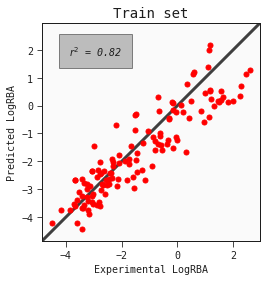

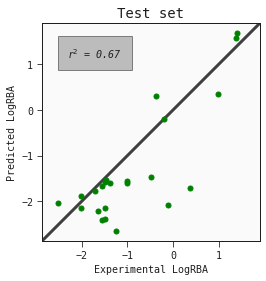

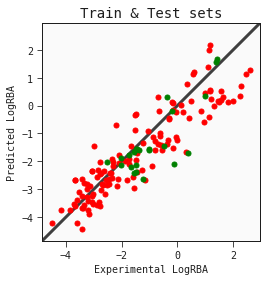

In [12]:
# Training set: Predictions from QDB_predictor

#QDB_Predictor(train['X2A'],train['TIC1'],train['EEig02d'],train['JGI10'],train['SPH'],train['E1u'],train['RTm_plus'],train['nArOR'])
y_pred_train = QDB_Predictor(train['X2A'],train['TIC1'],train['EEig02d'],train['JGI10'],train['SPH'],train['E1u'],train['RTm_plus'],train['nArOR'])
y_exp_train = train['LogRBA'].to_numpy()
PredPlot(y_exp_train,y_pred_train,'Train set','Experimental LogRBA','Predicted LogRBA','r')

# Test set: Predictions from QDB_predictor
y_pred_test = QDB_Predictor(test['X2A'],test['TIC1'],test['EEig02d'],test['JGI10'],test['SPH'],test['E1u'],test['RTm_plus'],test['nArOR'])
y_exp_test = test['LogRBA'].to_numpy()
PredPlot(y_exp_test,y_pred_test,'Test set','Experimental LogRBA','Predicted LogRBA','g')

# Train + Test in same plot
CombiPredPlot(y_exp_train,y_pred_train,y_exp_test,y_pred_test,'Train & Test sets','Experimental LogRBA','Predicted LogRBA','r')


In [13]:
ql.reset(random_seed=random_seed)

In [14]:
#------max_depth=1

In [15]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=1)

In [16]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8)
    ql.update(qgraph.best())

In [17]:
import sympy
qgraph[0].sympify()

1.96352 - 5.72011*exp(-0.31013*(1 - 0.0204583*TIC1)**2 - 2911.55*(JGI10 - 0.00610698)**2)

In [18]:
qgraph[0].save('c:/Users/models/_QSAR_/QSAR/graphs/qsar_estrogen_090621_MAXDEPTH1.graph')

In [19]:
qgraph[0].plot_summary(train)

In [20]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

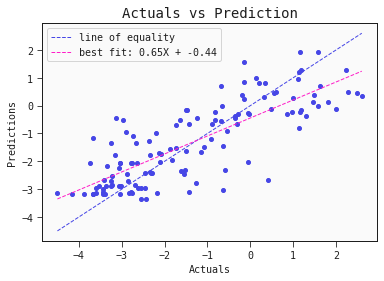

In [21]:
qgraph[0].plot_goodness_of_fit(data=train)
#predictions = best_graph.predict(test[input_columns])

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

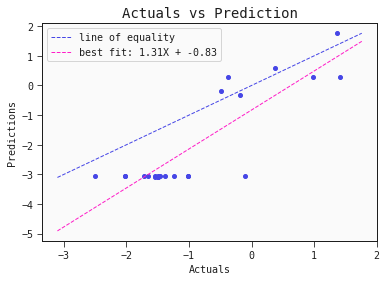

In [22]:
qgraph[0].plot_goodness_of_fit(data=test)

In [23]:
#------max_depth=2 ------------------------------------------------------------

In [24]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=2)

In [25]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8)
    ql.update(qgraph.best())

In [26]:
qgraph[0].save('c:/Users/models/_QSAR_/QSAR/graphs/qsar_estrogen_090621_MAXDEPTH2.graph')

In [27]:
qgraph[0].plot_summary(train)

In [28]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

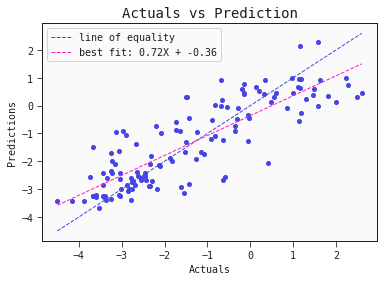

In [29]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

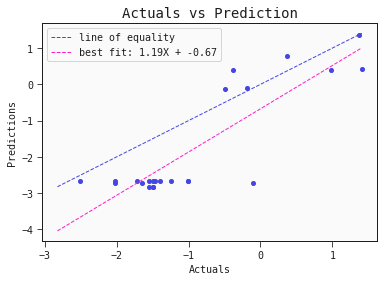

In [30]:
qgraph[0].plot_goodness_of_fit(data=test)

In [31]:
#------max_depth=3 ------------------------------------------------------------

In [32]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=3)

In [33]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8)
    ql.update(qgraph.best())

In [34]:
qgraph[0].save('c:/Users/models/_QSAR_/QSAR/graphs/qsar_estrogen_090621_MAXDEPTH3.graph')

In [35]:
qgraph[0].plot_summary(train)

In [36]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

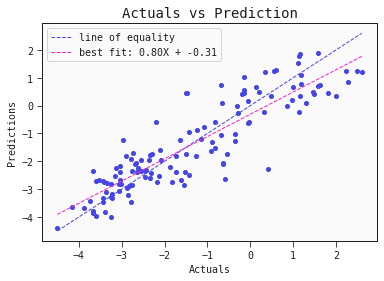

In [37]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

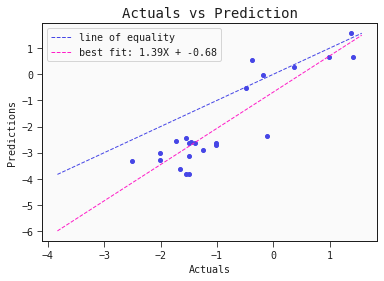

In [38]:
qgraph[0].plot_goodness_of_fit(data=test)

In [39]:
#------max_depth=4 ------------------------------------------------------------

In [44]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=4)

In [45]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8)
    ql.update(qgraph.best())

In [46]:
qgraph[0].save('c:/Users/models/_QSAR_/QSAR/graphs/qsar_estrogen_090621_MAXDEPTH4.graph')

In [47]:
qgraph[0].plot_summary(train)

In [48]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

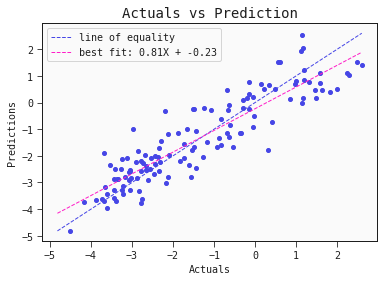

In [49]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

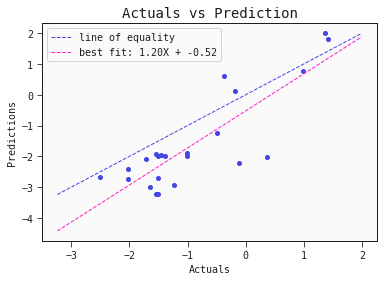

In [50]:
qgraph[0].plot_goodness_of_fit(data=test)

In [ ]:
# OK, so brute force did not work. Let's filter out some functions and restart...----

In [ ]:
#qgraph = qgraph.filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh"]))
#qgraph.fit(data)

In [51]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=1).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh"]))

In [52]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8)
    ql.update(qgraph.best())

In [53]:
qgraph[0].plot_summary(train)

In [54]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

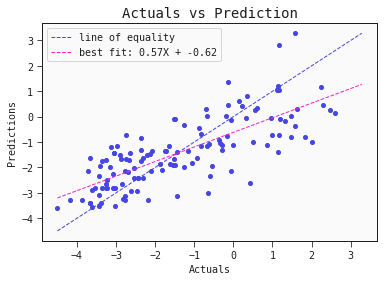

In [55]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

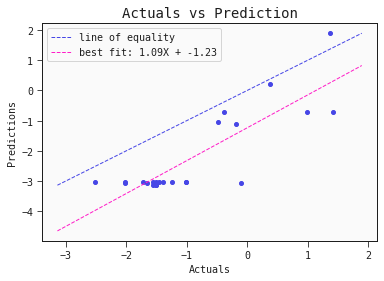

In [56]:
qgraph[0].plot_goodness_of_fit(data=test)

In [57]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=2).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh"]))

In [58]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8)
    ql.update(qgraph.best())

In [59]:
qgraph[0].plot_summary(train)

In [60]:
qgraph[0].plot_summary(test)

In [ ]:
# --- AIC criterion ---

In [61]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=2).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh"]))

In [62]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [63]:
qgraph[0].plot_summary(train)

In [64]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

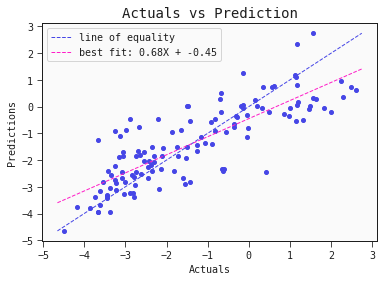

In [65]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

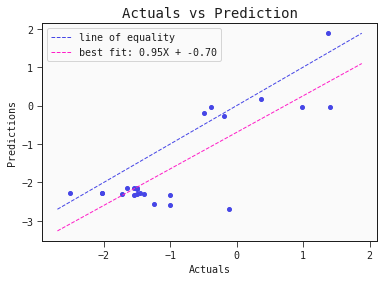

In [66]:
qgraph[0].plot_goodness_of_fit(data=test)

In [ ]:
# --- try AIC criterion, maxdepth =3

In [67]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=3).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh"]))

In [68]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [69]:
qgraph[0].plot_summary(train)

In [70]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

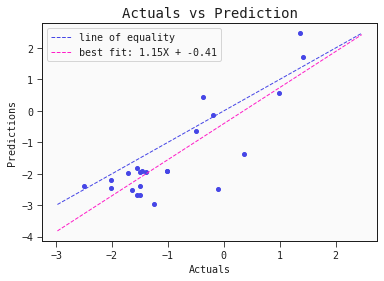

In [71]:
qgraph[0].plot_goodness_of_fit(data=test)

In [72]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [73]:
qgraph[0].save('c:/Users/models/_QSAR_/QSAR/graphs/qsar_estrogen_100621_MAXDEPTH3_NOGaussTanh.graph')

In [74]:
qgraph[0].plot_summary(train)

In [75]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

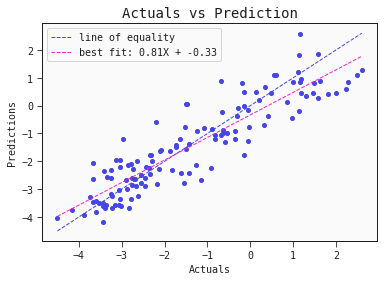

In [76]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

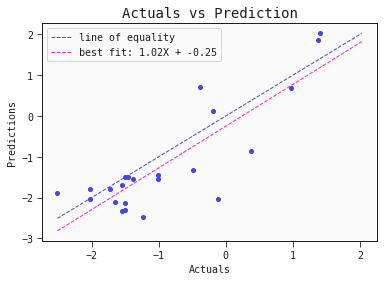

In [77]:
qgraph[0].plot_goodness_of_fit(data=test)

In [78]:
qgraph[0].sympify()

-10.0852*E1u - 2.18282*EEig02d + 4.6976*RTm_plus + 3.26074*SPH - 30.0468*X2A - 1.13955*nArOR - 2.16864*(1.7231 - 0.00925761*TIC1)*(2.28557 - 44.027*JGI10) + 19.5247

In [ ]:
% --- Exclude descriptor multiplications, maxdepth 3 ----

In [81]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=3).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh", "multiply"]))

In [82]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [83]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [95]:
# --- Exclude descriptor multiplications, maxdepth 4 -----

In [89]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=4).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh", "multiply"]))

In [90]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [91]:
qgraph[0].plot_summary(train)

In [92]:
qgraph[0].plot_summary(test)

In [94]:
# --- Re-introduce descriptor multiplications, maxdepth 4 -----

In [96]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=4).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh"]))

In [97]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [98]:
qgraph[0].plot_summary(train)

In [99]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

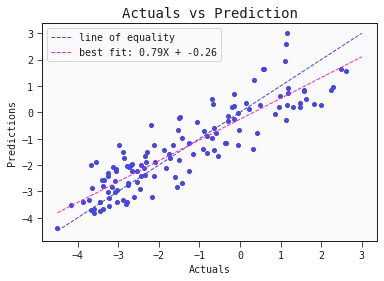

In [100]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

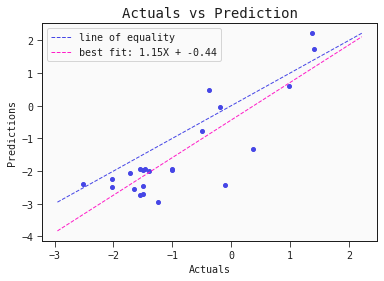

In [101]:
qgraph[0].plot_goodness_of_fit(data=test)

In [ ]:
# --- Re-introduce descriptor multiplications, maxdepth 5 -----

In [102]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=5).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh"]))

In [103]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [104]:
qgraph[0].plot_summary(train)

In [105]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

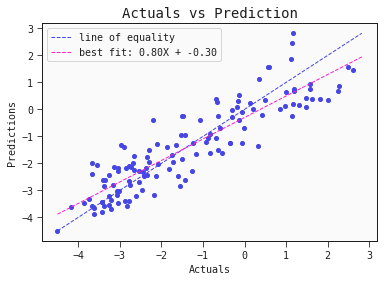

In [106]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

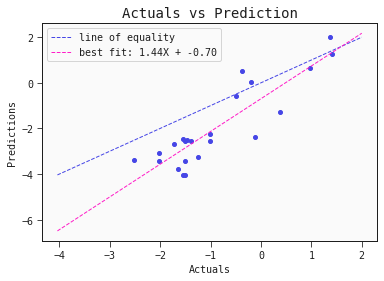

In [107]:
qgraph[0].plot_goodness_of_fit(data=test)

In [108]:
# --- Re-remove descriptor multiplications, maxdepth 6 -----

In [109]:
qgraph = ql.get_regressor(train.columns, output = target, max_depth=6).filter(feyn.filters.ExcludeFunctions(["gaussian", "tanh", "multiply"]))

In [110]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [111]:
#training loop
for _ in range(50):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [112]:
qgraph[0].plot_summary(train)

In [113]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

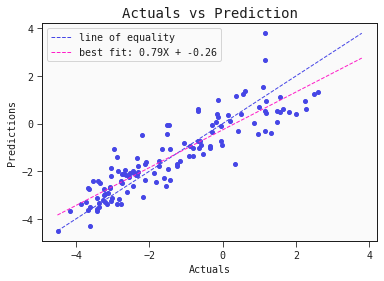

In [114]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

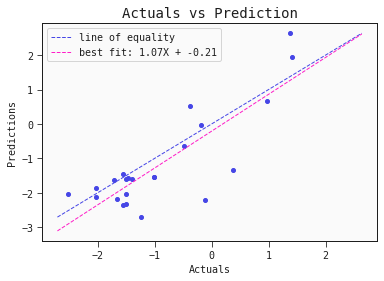

In [115]:
qgraph[0].plot_goodness_of_fit(data=test)

In [116]:
qgraph[0].sympify()

-2.65056*EEig02d + 88.9634*JGI10 + 4.82333*RTm_plus + 1.22814*SPH + 0.0452675*TIC1 - 48.4166*X2A - 1.37097*nArOR + 14.3755

In [117]:
qgraph[0].save('c:/Users/models/_QSAR_/QSAR/graphs/qsar_estrogen_100621_AllAdd.graph')

In [119]:
# Does this improve with more iterations?

In [118]:
#training loop
for _ in range(100):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [120]:
qgraph[0].save('c:/Users/models/_QSAR_/QSAR/graphs/qsar_estrogen_100621_LOSS0p608.graph')

In [121]:
qgraph[0].plot_summary(train)

In [122]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

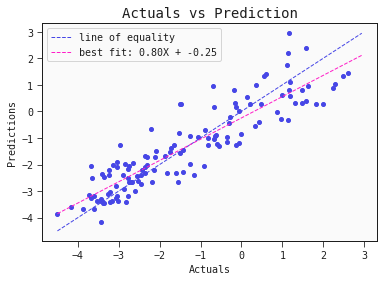

In [123]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

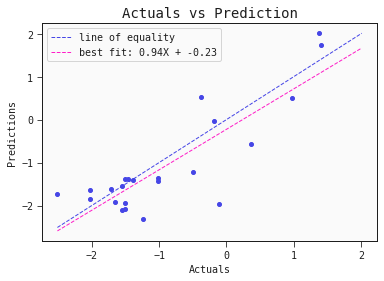

In [124]:
qgraph[0].plot_goodness_of_fit(data=test)

In [125]:
qgraph[0].sympify()

-8.00384*E1u - 1.90202*EEig02d + 80.608*JGI10 + 4.41059*RTm_plus + 2.94778*SPH + 0.0416398*TIC1 - 28.2944*X2A - 1.1401*nArOR + 9.32151

In [ ]:
# Almost there... try more iterations

In [126]:
#training loop
for _ in range(100):
    qgraph.fit(train, threads=8, criterion='aic')
    ql.update(qgraph.best())

In [127]:
qgraph[0].plot_summary(train)

In [129]:
qgraph[0].plot_summary(test)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

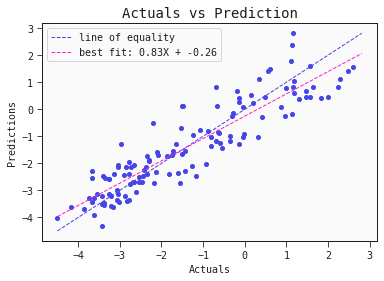

In [130]:
qgraph[0].plot_goodness_of_fit(data=train)

<AxesSubplot:title={'center':'Actuals vs Prediction'}, xlabel='Actuals', ylabel='Predictions'>

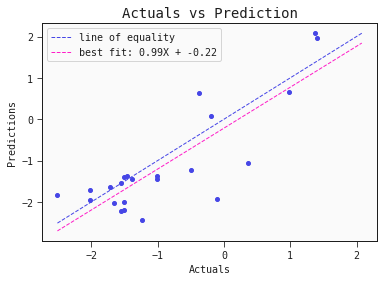

In [131]:
qgraph[0].plot_goodness_of_fit(data=test)

In [ ]:
# --- Perhaps starting to get into overfitting ?? Anyways, try more iterations...